In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
messages = pd.read_csv('../input/spam.csv', delimiter = ',', encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop the column that are not required.


In [3]:
messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

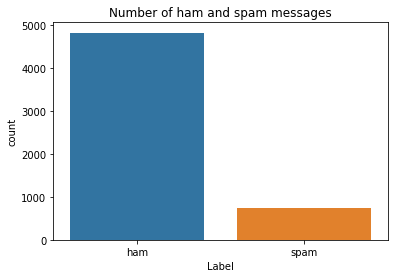

In [4]:
sns.countplot(messages.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [5]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis(EDA)

In [6]:
messages.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

now we have to start thinking about the number of features or we call as feature
engineering, better than knowledge abaout the data, better we will have the
ability to feature the data. 

add one more colummn related to the length of the messages. 

In [8]:
messages['length'] = messages['v2'].apply(len)

In [9]:
messages.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization

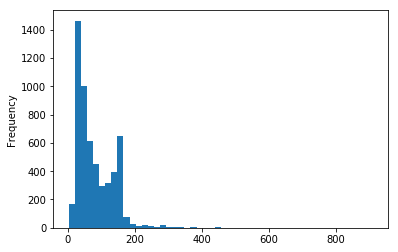

In [10]:
messages['length'].plot.hist(bins=50)

In [11]:
messages['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

looks like highest length size of the message is 910 characters. 

lets try to explore is the length of the message is the distinguish feature between spam or ham messages. 

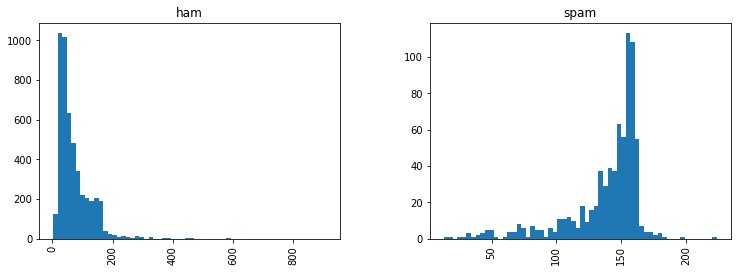

In [12]:
messages.hist(column='length', by='v1', bins=60, figsize=(12,4));

spam messages has more number of characters as compared to Ham Messages. 

# Remove Punctuation & Stopwords 

lets do some Text Pre-Processing. if we need to do some classification algorithm
then we need some numerical vector values. in order to convert word into vector we will use Bag of words. 

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
from nltk.corpus import stopwords
stopwords.words("english")[100:110]

['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']

In [15]:
mess = 'Sample Message! Notice: it has punctuation.'
nopunc = [c for c in mess if c not in string.punctuation]

In [16]:
nopunc = "".join(nopunc)
nopunc

'Sample Message Notice it has punctuation'

In [17]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [18]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

Lets apply the same to all messages in the data frame


In [20]:
def text_process(mess):
    '''
    1.remove punctuaton
    2.remove stop words
    3. return list of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [21]:
messages.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
messages = messages.rename(columns={"v1": "label", "v2": "message"})

In [23]:
messages['spam'] = messages['label'].map({'spam': 1, 'ham': 0}).astype(int)
messages.head(10)

,label,message,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1
6,ham,Even my brother is not like to speak with me. ...,77,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,0
8,spam,WINNER!! As a valued network customer you have...,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1


# apply Tokenization

In [24]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Currently all the messages are as list of tokens and now we need to covert each of those messages into a vector the Scikit Learn's models can work with.
we'll do that in three steps using bag-of-words model:

**1. Count how many times does a word occur in each message (known as term frequency).**

**2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency).**

**3. Normalize the vector to unit length, to abstract from the original text length (L2 norm).**

* Let's begin with the first step: *

** Each vector will have as many dimensions as there are unique words in the SMS corpus. We will use Scikit's Learn CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.**

** we can imagine this as a 2-Dimensional matrix. where the 1-dimension is the entire vocabulary(1 row per word) and the other dimension are the actual documents, in this case a column per text message.**

For example:

**|            |Message 1|Message 2|...|Message N|**
**|Word 1 Count|0        |1        |...|0        |**
**|Word 2 Count|0        |1        |...|0        |**
**|...         |         |...      |...|...      |**
**|Word N Count|0        |1        |...|1        |**

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document.
Beacuse of this, scikit learn will output a  Sparse Matrix (https://en.wikipedia.org/wiki/Sparse_matrix)

# CountVectorizer(bag-of-word)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [27]:
print(len(bow_transformer.vocabulary_))

11304


In [28]:
# grab the 4th message

mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [29]:
bow4 = bow_transformer.transform([mess4])

In [30]:
print(bow4)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2


In [31]:
print(bow4.shape)

(1, 11304)


In [32]:
bow_transformer.get_feature_names()[3996]

'U'

In [33]:
bow_transformer.get_feature_names()[9445]

'say'

In [34]:
# apply to whole dataframe
messages_bow = bow_transformer.transform(messages['message'])

In [35]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11304)


In [36]:
messages_bow.nnz  # non zero occurance

50193

# Vectorizing Data: TF-IDF

** Weight and Normalization is done using TF-IDF **

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [39]:
tfidf4 = tfidf_transformer.transform(bow4)

In [40]:
print(tfidf4) # weight values for each of the word 

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [41]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

**message are finaly converted into vector**

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier().fit(messages_tfidf, messages['label'])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
model.predict(tfidf4)

array(['ham'], dtype=object)

In [45]:
messages['label'][3]

'ham'

In [46]:
all_pred = model.predict(messages_tfidf)

In [47]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

**proper way to do is train-test-split**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=42)

**Pipeline helps to save the complete workflow**

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [52]:
pipeline.fit(msg_train, label_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7faa1aec2840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [53]:
predictions = pipeline.predict(msg_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       0.99      0.75      0.86       219

   micro avg       0.97      0.97      0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b